In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
import pandas as pd



current_folder = 'C:/Users/debryu/Desktop/VS_CODE/HOME/ANLP/ANLP_project/ANLP/longformer/'

with open(current_folder + 'data/embedsFullEpoch.pickle', 'rb') as file:
    data = pickle.load(file)
  
embeddings = np.array(data['embeddings'])
title = np.array(data['raw'])
ids = np.array(data['id'])
labels = range(len(embeddings))

# Create a pandas dataframe containing embeddings and titles
df = pd.DataFrame(embeddings)
df['title'] = title
df['id'] = ids

# Show the dataframe 
print(df.head(10))

          0         1         2         3         4         5         6  \
0  0.027596  0.137006  0.021410 -0.038464  0.047496 -0.154506  0.027768   
1  0.040066  0.137237  0.015359 -0.034229  0.067965 -0.160462  0.019082   
2  0.040628  0.161660 -0.000791 -0.089918  0.095500 -0.155539  0.011590   
3 -0.075394 -0.161073 -0.218471  0.082089  0.178752 -0.523623  0.286262   
4  0.045701  0.153583  0.027796 -0.057272  0.085586 -0.149031  0.003963   
5  0.054260  0.149701  0.012554 -0.037394  0.069687 -0.166724  0.005530   
6  0.067334  0.140686 -0.003506 -0.009243  0.051200 -0.162713  0.026447   
7  0.044943  0.140144  0.007829 -0.003166  0.034030 -0.147123  0.013370   
8  0.044293  0.140638  0.005444 -0.020331  0.031239 -0.194329  0.026013   
9  0.027125  0.095844 -0.048467 -0.087868  0.343803 -0.238491  0.061413   

          7         8         9  ...       760       761       762       763  \
0 -0.037934  0.032261 -0.092420  ... -0.082626 -0.108860  0.014533 -0.102522   
1 -0.048597  0

In [1]:
from transformers import pipeline
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import pickle
import os
import torch.nn.functional as F
from tqdm import tqdm 
import gc
import numpy as np

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

model_name = "allenai/longformer-base-4096"
save_path = "C:/Users/debryu/Desktop/VS_CODE/HOME/ANLP/ANLP_project/ANLP/saved_models/MLM/longformer-base-4096/epochs/"

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
vocab_size = len(tokenizer)
print('Vocab tokenizer size', vocab_size)
#tokenized_content = tokenizer.tokenize("my name is earl", return_tensors='pt')
#print(tokenized_content)

from transformers import AutoModel, AutoModelForMaskedLM
longformerMLM = AutoModelForMaskedLM.from_pretrained(model_name, output_hidden_states=True)
longformerMLM.to(device)


longformerMLM.load_state_dict(torch.load(save_path + 'longformerNew_partial_epoch2.pth', map_location=torch.device(device)))
print('Model loaded!')

longformerMLM.eval()

def getEmbedding(text):
    tokenized_text = torch.tensor(tokenizer.encode(text, return_tensors='pt').to(device))
    output = longformerMLM(tokenized_text)
    last_layer = output['hidden_states'][-1].squeeze(0)
    cls_token = last_layer[0].squeeze(0)
    return cls_token

def getEmbeddingFromTokens(tokenized_text):
    output = longformerMLM(tokenized_text)
    #print(output)
    last_layer = output['hidden_states'][-1].squeeze(0)
    cls_token = last_layer[0].squeeze(0)
    return cls_token


query_embs = getEmbedding('annullamento della graduatoria relativa al bando di concorso pubblico per titoli ed esami').to('cpu').tolist()





c:\Users\debryu\miniconda3\envs\anlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:0
Vocab tokenizer size 50265


Some weights of LongformerForMaskedLM were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded!


C:\Users\debryu\AppData\Local\Temp\ipykernel_18184\2031619823.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tokenized_text = torch.tensor(tokenizer.encode(text, return_tensors='pt').to(device))


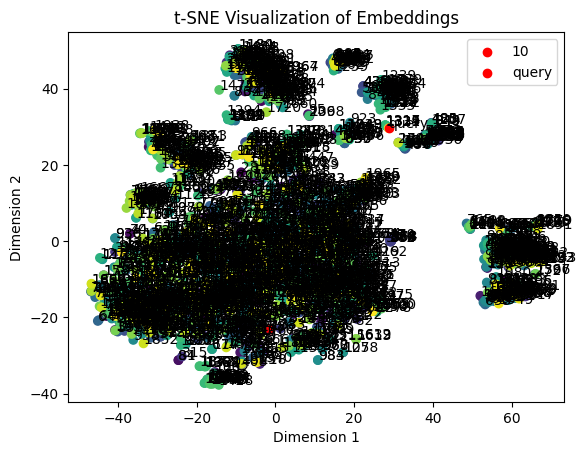

In [4]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
import pandas as pd

current_folder = 'C:/Users/debryu/Desktop/VS_CODE/HOME/ANLP/ANLP_project/ANLP/longformer/'
with open(current_folder + 'data/newEmbedsFullEpoch.pickle', 'rb') as file:
    data = pickle.load(file)

embeddings = np.array(data['embeddings'])
title = np.array(data['raw'])
ids = np.array(data['id'])
labels = range(len(embeddings)+1)

#Add the query embedding to the embeddings
embeddings = np.vstack((embeddings, query_embs))

#Add the query title to the titles
title = np.append(title, 'query')

#Add the query id to the ids
ids = np.append(ids, 'query')

#print(ids)
#print(title)

file = open(current_folder + '/data/Legend.txt' , "w")
for i in range(len(embeddings)):
    file.write(f'{ids[i]}: {title[i]}\n\n')

file.close()

tsne = TSNE(n_components=2, random_state=42)

embedding_tsne = tsne.fit_transform(embeddings)

plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=labels)
plt.scatter(embedding_tsne[9, 0], embedding_tsne[9, 1], c='r', label='10')
plt.scatter(embedding_tsne[-1, 0], embedding_tsne[-1, 1], c='r', label='query')

if(True):
    for i in range(len(embedding_tsne)):
        plt.annotate(str(ids[i]), (embedding_tsne[i, 0], embedding_tsne[i, 1]))



plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()
